In [2]:
import sys
import numpy as np
import pandas as pd


sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

from Finance.primitive import BrownianMotion

In [27]:
high_mean = 0.005
low_mean = 0.005

T = 1000

In [28]:
gbm_high = BrownianMotion(S0=100, mu=0.005, sigma=0.03, T=T, I=1)
gbm_low = BrownianMotion(S0=100, mu=-0.005, sigma=0.03, T=T, I=1)

In [29]:
gbm = pd.concat([gbm_high, gbm_low], axis=1)
gbm.columns = ['high', 'low']

<AxesSubplot:>

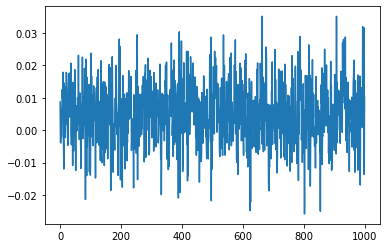

In [34]:
pd.Series(np.random.normal(high_mean, 0.01, T)).plot()